<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [3]:
%matplotlib inline
#from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Boundary Value Problems:  Discretization

## Model Problems

The simplest boundary value problem (BVP) we will run into is the one-dimensional version of Poisson's equation
$$
    u''(x) = f(x).
$$

Usually we solve this equation on a finite interval with either Dirichlet or Neumann boundary conditions.  Because there are two derivatives in the equation we need two boundary conditions to solve the PDE (really and ODE in this case) uniquely.  To start let us consider the following basic problem

$$\begin{aligned}
    u''(x) = f(x) \quad \Omega = [a, b] \\
    u(a) = \alpha \quad u(b) = \beta.
\end{aligned}$$

<font color = "red">
$f(x)$ has to be twice integrable for the problem to be well posed and the solution not to blow up.

BVPs of this sort are often the result of looking at the steady-state form of a time dependent PDE.  For instance, if we were considering the steady-state solution to the heat equation
$$
    u_t(x,t) = \kappa u_{xx}(x,t) + \Psi(x,t) \quad \Omega = [0, T] \times [a, b] \\
    u(x, 0) = u^0(x) \quad u(a, t) = \alpha(t) \quad u(b, t) = \beta(t)
$$
we would solve the equation where $u_t = 0$ and arrive at
$$
    u''(x) = - \frac{\Psi}{\kappa},
$$
a version of Poisson's equation above.

In higher spatial dimensions the second derivative turns into a Laplacian.  Notation varies for this but all these are equivalent statements:
$$\begin{aligned}
    \nabla^2 u(\vec{x~}) &= f(\vec{x~}) \\
    \Delta u(\vec{x~}) &= f(\vec{x~}) \\
    \sum^N_{i=1} u_{x_i x_i} &= f(\vec{x~}).
\end{aligned}$$

## One-Dimensional Discretization

As a first approach to solving the one-dimensional Poisson's equation let's break up the domain into `m` points, often called a *mesh* or *grid*.  Our goal is to approximate the unknown function $u(x)$ as the mesh points $x_i$.  First we can relate the number of mesh points `m` to the distance between with
$$
    \Delta x = \frac{1}{m + 1}.
$$
The mesh points $x_i$ can be written as
$$
    x_i = a + i \Delta x.
$$

We can let $\Delta x$ vary and many of the formulas above have only minor modifications but we will leave that for homework.  Notationally we will also adopt the notation
$$
    U_i \approx u(x_i)
$$
so that $U_i$ are the approximate solution at the grid points and retain the lower-case $u$ to denote the true solution.

<font color="red">
$u(a)$ and $u(b)$ are known from B.C.

To simplify our discussion let's consider the ODE
$$
    u''(x) = f(x) \quad \Omega = [0, 1] \\
    u(0) = \alpha \quad u(1) = \beta.
$$

Applying the 2nd order, centered difference approximation for the 2nd derivative we have the equation
$$
    D^2 U_i = \frac{1}{\Delta x^2} (U_{i+1} - 2 U_i + U_{i-1})
$$
so that we end up with the approximate algebraic expression at every grid point of
$$
    \frac{1}{\Delta x^2} (U_{i+1} - 2 U_i + U_{i-1}) = f(x_i) \quad i = 1, 2, 3, \ldots, m.
$$

Note at this point that these algebraic equations are coupled as each $U_i$ depends on its neighbors.  This means we can write these as system of coupled equations
$$
    A U = F.
$$

#### Write the system of equations
$$
    \frac{1}{\Delta x^2} (U_{i+1} - 2 U_i + U_{i-1}) = f(x_i) \quad i = 1, 2, 3, \ldots, m.
$$

Note the boundary conditions!

$$
    \frac{1}{\Delta x^2} \begin{bmatrix}
    -2 &  1 &    &    &    \\
     1 & -2 &  1 &    &    \\
       &  1 & -2 &  1 &    \\
       &    &  1 & -2 &  1 \\
       &    &    &  1 & -2 \\
    \end{bmatrix} \begin{bmatrix}
        U_1 \\ U_2 \\ U_3 \\ U_4 \\ U_5
    \end{bmatrix} = 
    \begin{bmatrix}
        f(x_1) - \frac{\alpha}{\Delta x^2} \\ f(x_2) \\ f(x_3) \\ f(x_4) \\ f(x_5) - \frac{\beta}{\Delta x^2} \\
    \end{bmatrix}.
$$

#### Example

Want to solve the BVP
$$
    u_{xx} = e^x, \quad x \in [0, 1] \quad \text{with} \quad u(0) = 0.0, \text{ and } u(1) = 3
$$
via the construction of a linear system of equations.

$$\begin{aligned}
    u_{xx} &= e^x \\
    u_x &= A + e^x \\
    u &= Ax + B + e^x\\
    u(0) &= B + 1 = 0 \Rightarrow B = -1 \\
    u(1) &= A - 1 + e^{1} = 3 \Rightarrow A = 4 - e\\ 
    ~\\
    u(x) &= (4 - e) x - 1 + e^x
\end{aligned}$$

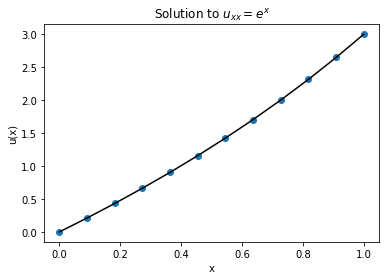

In [4]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = lambda x: numpy.exp(x)
u_true = lambda x: (4.0 - numpy.exp(1.0)) * x - 1.0 + numpy.exp(x)

# Descretization
m = 10
x_bc = numpy.linspace(a, b, m + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (m + 1)

# Construct matrix A
A = numpy.zeros((m, m))
diagonal = numpy.ones(m) / delta_x**2
A += numpy.diag(diagonal * -2.0, 0)
A += numpy.diag(diagonal[:-1], 1)
A += numpy.diag(diagonal[:-1], -1)

# Construct RHS
b = f(x)
b[0] -= u_a / delta_x**2
b[-1] -= u_b / delta_x**2

# Solve system
U = numpy.empty(m + 2)
U[0] = u_a
U[-1] = u_b
U[1:-1] = numpy.linalg.solve(A, b)

# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
plt.show()

<font color = "red">
Even with m=10 we have a good solver. 

## Error Analysis

A natural question to ask given our approximation $U_i$ is how close this is to the true solution $u(x)$ at the grid points $x_i$.  To address this we will define the error $E$ as
$$
    E = U - \hat{U~}
$$
where $U$ is the vector of the approximate solution and $\hat{U~}$ is the vector composed of the $u(x_i)$ such that
$$
    \hat{U_i} = u(x_i)
$$

This leaves $E$ as a vector still so often we ask the question how does the norm of $E$ behave given a particular $\Delta x$.  For the $\infty$-norm we would have
$$
    ||E||_\infty = \max_{1 \leq i \leq m} |E_i| = \max_{1 \leq i \leq m} |U_i - u(x_i)|
$$

If we can show that $||E||_\infty$ goes to zero as $\Delta x \rightarrow 0$ we can then claim that the approximate solution $U_i$ at any of the grid points $E_i \rightarrow 0$.  If we would like to use other norms we often define slightly modified versions of the norms that also contain the grid width $\Delta x$ where
$$\begin{aligned}
    ||E||_1 &= \Delta x \sum^m_{i=1} |E_i| \\
    ||E||_2 &= \left( \Delta x \sum^m_{i=1} |E_i|^2 \right )^{1/2}
\end{aligned}$$
These are referred to as *grid function norms*.

The $E$ defined above is known as the *global error*.  One of our main goals throughout this course is to understand how $E$ behaves given other factors as we defined later.

### Local Truncation Error

The *local truncation error* (LTE) can be defined by replacing the approximate solution $U_i$ by the approximate solution $u(x_i)$.  Since the algebraic equations are an approximation to the original BVP, we do not expect that the true solution will exactly satisfy these equations, this resulting difference is the LTE.

For our one-dimensional finite difference approximation from above we have
$$
    \frac{1}{\Delta x^2} (U_{i+1} - 2 U_i + U_{i-1}) = f(x_i).
$$

Replacing $U_i$ with $u(x_i)$ in this equation leads to
$$
    \tau_i = \frac{1}{\Delta x^2} (u(x_{i+1}) - 2 u(x_i) + u(x_{i-1})) - f(x_i).
$$

In this form the LTE is not as useful but if we assume $u(x)$ is smooth we can repalce the $u(x_i)$ with their Taylor series counterparts, similar to what we did for finite differences.  The relevant Taylor series are
$$
    u(x_{i \pm 1}) = u(x_i) \pm u'(x_i) \Delta x + \frac{1}{2} u''(x_i) \Delta x^2 \pm \frac{1}{6} u'''(x_i) \Delta x^3 + \frac{1}{24} u^{(4)}(x_i) \Delta x^4 + \mathcal{O}(\Delta x^5)
$$

This leads to an expression for $\tau_i$ of
$$\begin{aligned}
    \tau_i &= \frac{1}{\Delta x^2} \left [u''(x_i) \Delta x^2 + \frac{1}{12} u^{(4)}(x_i) \Delta x^4 + \mathcal{O}(\Delta x^5) \right ] - f(x_i) \\
    &= u''(x_i) + \frac{1}{12} u^{(4)}(x_i) \Delta x^2 + \mathcal{O}(\Delta x^4) - f(x_i) \\
    &= \frac{1}{12} u^{(4)}(x_i) \Delta x^2 + \mathcal{O}(\Delta x^4)
\end{aligned}$$
where we note that the true solution would satisfy $u''(x) = f(x)$.

As long as $ u^{(4)}(x_i) $ remains finite (smooth) we know that $\tau_i \rightarrow 0$ as $\Delta x \rightarrow 0$

We can also write the vector of LTEs as
$$
    \tau = A \hat{U~} - F
$$
which implies
$$
    A\hat{U~} = F + \tau.
$$
Note that here it is the exact solution evaluated stencil, not the approximated function.

<font color = "red">
Somethimes $\tau$ is called residue. 

### Global Error

What we really want to bound is the global error $E$.  To relate the global error and LTE we can substitute $E = U - \hat{U~}$ into our expression for the LTE to find
$$
    A E = -\tau.
$$
This means that the global error is the solution to the system of equations we defined for the approximation except with $\tau$ as the forcing function rather than $F$!

This also implies that the global error $E$ can be thought of as an approximation to similar BVP as we started with where
$$
    e''(x) = -\tau(x) \quad \Omega = [0, 1] \\
    e(0) = 0 \quad e(1) = 0.
$$

We can solve this ODE directly by integrating twice since to find to leading order
$$\begin{aligned}
    e(x) &\approx -\frac{1}{12} \Delta x^2 u''(x) + \frac{1}{12} \Delta x^2 (u''(0) + x (u''(1) - u''(0))) \\
    &= \mathcal{O}(\Delta x^2) \rightarrow 0 \quad \text{as} \quad \Delta x \rightarrow 0.
\end{aligned}$$

### Stability

We showed that the continuous analog to $E$, $e(x)$, does in fact go to zero as $\Delta x \rightarrow 0$ but what about $E$?  Instead of showing something based on $e(x)$ let's look back at the original system of equations for the global error
$$
    A_{\Delta x} E_{\Delta x} = - \tau_{\Delta x}
$$
where we now denote a particular realization of the system by the corresponding grid spacing $\Delta x$.  

If we could invert $A_{\Delta x}$ we could compute $E_{\Delta x}$ directly.  Assuming that we can and taking an appropriate norm we find
$$\begin{aligned}
    E_{\Delta x} &= (A_{\Delta x})^{-1} \tau_{\Delta x} \\
    ||E_{\Delta x}|| &= ||(A_{\Delta x})^{-1} \tau_{\Delta x}|| \\
    & \leq ||(A_{\Delta x})^{-1} ||~|| \tau_{\Delta x}||
\end{aligned}$$

<font color = "red">
$E$ is the global error. Inverse of $A$ is mapping the truncation error to the global error. We are always considering the global error when doing computations. 


We know that $\tau_{\Delta x} \rightarrow 0$ as $\Delta x \rightarrow 0$ already for our example so if we can bound the norm of the matrix $(A_{\Delta x})^{-1}$ by some constant $C$ for sufficiently small $\Delta x$ we can then write a bound on the global error of
$$
    ||E_{\Delta x}|| \leq C ||\tau_{\Delta x}||
$$
demonstrating that $E_{\Delta x} \rightarrow 0 $ at least as fast as $\tau_{\Delta x} \rightarrow 0$.

<font color = "red">
Bound the global error by the local truncation error. $C$ can depend on $\Delta x$ and this can be an issue.

We can generalize this observation to all linear BVP problems by supposing that we have a finite difference approximation to a linear BVP of the form
$$
    A_{\Delta x} U_{\Delta x} = F_{\Delta x},
$$
where $\Delta x$ is the grid spacing.  

<font color = "red">
There is a linearity assumption here. What if not?

We say the approximation is *stable* if $(A_{\Delta x})^{-1}$ exists $\forall \Delta x < \Delta x_0$ and there is a constant $C$ such that
$$
    ||(A_{\Delta x})^{-1}|| \leq C \quad \forall \Delta x < \Delta x_0.
$$

<font color = "red">
If we cannot invert $A$ then we may deal with non-uniquneness and ill posed problem. Why? 

### Consistency

A related and important idea for the discretization of any PDE is that it be consistent with the equation we are approximating.  If
$$
    ||\tau_{\Delta x}|| \rightarrow 0 \quad \text{as}\quad  \Delta x \rightarrow 0
$$
then we say an approximation is *consistent* with the differential equation.

### Convergence

We now have all the pieces to say something about the global error $E$.  A method is said to be *convergent* if
$$
    ||E_{\Delta x}|| \rightarrow 0 \quad \text{as} \quad \Delta x \rightarrow 0.
$$

<font color = "red">
$E$ is the global error.

We want to prove that the method is convergent: we prove it is stable and consistent. 

If an approximation is both consistent ($||\tau_{\Delta x}|| \rightarrow 0$ as $\Delta x \rightarrow 0$) and stable ($||E_{\Delta x}|| \leq C ||\tau_{\Delta x}||$) then the approximation is convergent.

We have only derived this in the case of linear BVPs but in fact these criteria for convergence are often found to be true for any finite difference approximation (and beyond for that matter).  This statement of convergence can also often be strengthened to say
$$
    \mathcal{O}(\Delta x^p) \text{ LTE } + \text{ stability } \Rightarrow \mathcal{O}(\Delta x^p) \text{ global error}.
$$

It turns out the most difficult part of this process is usually the statement regarding stability.  In the next section we will see for our simple example how we can prove stability in the 2-norm.

### Stability in the 2-Norm

Recalling our definition of stability, we need to show that for our previously defined $A$ that
$$
    (A_{\Delta x})^{-1}
$$
exists and
$$
    ||(A_{\Delta x})^{-1}|| \leq C \quad \forall \Delta x < \Delta x_0
$$
for some $C$.  

<font color = "red">

Induced matrix (vector?) norm: $max||Ax||_2$ for $x \in B$. Vector norms are induced matrix norm. Why? Frobenious norm? 

We can show that $A$ is in fact invertible but can we bound the norm of the inverse?  Recall that the 2-norm of a symmetric matrix is equal to its spectral radius, i.e.
$$
    ||A||_2 = \rho(A) = \max_{1\leq p \leq m} |\lambda_p|.
$$

Since the inverse of $A$ is also symmetric the eigenvalues of $A^{-1}$ are the inverses of the eigenvalues of $A$ implying that
$$
    ||A^{-1}||_2 = \rho(A^{-1}) = \max_{1\leq p \leq m} \left| \frac{1}{\lambda_p} \right| = \frac{1}{\max_{1\leq p \leq m} \left| \lambda_p \right|}.
$$

<font color = "red">
Eighenvalues of $A^{-1}$ are $1/\lambda$ where $\lambda$ are from $A$.

If none of the $\lambda_p$ of $A$ are zero for sufficiently small $\Delta x$ and the rest are finite as $\Delta x \rightarrow 0$ we have shown the stability of the approximation.

The eigenvalues of the matrix $A$ from above can be written as
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$
with the corresponding eigenvectors $v^p$ 
$$
    v^p_j = \sin(p \pi j \Delta x)
$$
as the $j$th component with $j = 1, \ldots, m$.

#### Check that these are in fact the eigenpairs of the matrix $A$
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$

$$
    v^p_j = \sin(p \pi j \Delta x)
$$

$$\begin{aligned}
    (A v^p)_j &= \frac{1}{\Delta x^2} (v^p_{j-1} - 2 v^p_j + v^p_{j+1} ) \\
    &= \frac{1}{\Delta x^2} (\sin(p \pi (j-1) \Delta x) - 2 \sin(p \pi j \Delta x) + \sin(p \pi (j+1) \Delta x) ) \\
    &= \frac{1}{\Delta x^2} (\sin(p \pi j \Delta x) \cos(p \pi \Delta x) - 2 \sin(p \pi j \Delta x) + \sin(p \pi j \Delta x) \cos(p \pi \Delta x) \\
    &= \lambda_p v^p_j.
\end{aligned}$$

<font color = "red">
p-th eigenvector

#### Compute the smallest eigenvalue
If we can show that the eigenvalues are away from the origin then we know $||A||_2$ will be bounded.  In this case the eigenvalues are negative so we need to show that they are always strictly less than zero.

$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$
Use a Taylor series to get an idea of how this behaves with respect to $\Delta x$

From these expressions we know that smallest eigenvalue is
$$\begin{aligned}
    \lambda_1 &= \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1) \\
    &= \frac{2}{\Delta x^2} \left (-\frac{1}{2} p^2 \pi^2 \Delta x^2 + \frac{1}{24} p^4 \pi^4 \Delta x^4 + \mathcal{O}(\Delta^6) \right ) \\
    &= -p^2 \pi^2 + \mathcal{O}(\Delta x^2).
\end{aligned}$$

Note that this also gives us an error bound as this eigenvalue also will also lead to the largest eigenvalue of the inverse matrix.  We can therefore say
$$
    ||E^{\Delta x}||_2 \leq ||(A^{\Delta x})^{-1}||_2 ||\tau^{\Delta x}||_2 \approx \frac{1}{\pi^2} ||\tau^{\Delta x}||_2.
$$

<font color = "red">
Even when $\Delta x$ goes to zero, we wont have $\lambda$ go to zero. 

### Stability in the $\infty$-Norm

The straight forward approach to show that $||E||_\infty \rightarrow 0$ as $\Delta x \rightarrow 0$ would be to use the matrix bound
$$
    ||E||_\infty \leq \frac{1}{\sqrt{\Delta x}} ||E||_2.
$$

For our example problem we showed that $||E||_2 = \mathcal{O}(\Delta x^2)$ so this implies that we at least know that $||E||_\infty = \mathcal{O}(\Delta x^{3/2})$.  This is unfortunate as we expect $||E||_\infty = \mathcal{O}(\Delta x^{2})$ due to the discretization.  In order to alleviate this problem let's go back and consider our definition of stability but this time consider the $\infty$-norm.

It turns out that our matrix $A$ can be seen as a number of discrete approximations to *Green's functions* in each column.  This is more broadly applicable later on so we will spend some time reviewing the theory of Green's functions and apply them to our simple example problem.

<font color = "red">
Geen's function is mapping from initial data to solution. $A^{-1}$ is doing similar mapping and can be seen as discrete Green's function. 

### Green's Functions

Consider the BVP with Dirichlet boundary conditions
$$
    u''(x) = f(x) \quad \Omega = [0, 1] \\
    u(0) = \alpha \quad u(1) = \beta.
$$
Pick a fixed point $\bar{x} \in \Omega$, the Green's function $G(x ; \bar{x})$ solves the BVP above with
$$
    f(x) = \delta(x - \bar{x})
$$
and $\alpha = \beta = 0$.  You could think of this as the result of a steady-state problem of the heat equation with a point-loss of heat somewhere in the domain.

To find the Green's function for our particular problem we can integrate just around the point $\bar{x}$ near the $\delta$ function source to find

$$\begin{aligned}
    \int^{\bar{x} + \epsilon}_{\bar{x} - \epsilon} u''(x) dx &= \int^{\bar{x} + \epsilon}_{\bar{x} - \epsilon} \delta(x - \bar{x}) dx \\
    u'(\bar{x} + \epsilon) - u'(\bar{x} - \epsilon) &= 1
\end{aligned}$$

recalling that by definition the integral of the $\delta$ function must be 1 if the interval of integration includes $\bar{x}$.  We see that the jump in the derivative at $\bar{x}$ from the left and right should be 1.

After a bit of algebra we can solve for the Green's function for our model BVP as
$$
    G(x; \bar{x}) = \left \{ \begin{aligned}
        (\bar{x} - 1) x & & 0 \leq x \leq \bar{x} \\
        \bar{x} (x - 1) & & \bar{x} \leq x \leq 1
    \end{aligned} \right . .
$$

One imporant property of linear PDEs (or ODEs) in general is that they exhibit the principle of superposition.  The reason we care about this with Green's functions is that if we have a $f(x)$ composed of two $\delta$ functions, it turns out the solution is the sum of the corresponding two Green's functions.  For instance if
$$
    f(x) = \delta(x - 0.25) + 2 \delta(x - 0.5)
$$
then
$$
    u(x) = G(x ; 0.25) + 2 G(x ; 0.5).
$$

This of course can be extended to an infinite number of $\delta$  functions so that
$$
    f(x) = \int^1_0 f(\bar{x}) \delta(x - \bar{x}) d\bar{x}
$$
and therefore
$$
    u(x) = \int^1_0 f(\bar{x}) G(x ; \bar{x}) d\bar{x}.
$$

To incorporate the effects of boundary conditions we can continue to add Green's functions to the solution to find the general solution of our original BVP as
$$
    u(x) = \alpha (1 - x) + \beta x + \int^1_0 f(\bar{x}) G(x ; \bar{x}) d\bar{x}.
$$

So why did we do all this?  Well the Green's function solution representation above can be thought of as a linear operator on the function $f(x)$.  Written in perhaps more familiar terms we have
$$
    \mathcal{A} u = f \quad u = \mathcal{A}^{-1} f.
$$
We see now that our linear operator $\mathcal{A}$ may be the continuous analog to our discrete matrix $A$.

To proceed we will modify our original matrix $A$ into a slightly different version based on the same discretization.  Instead of moving the boundary terms to the right-hand-side of the equation instead we will introduce two new "unknowns", called *ghost cells*, that will be placed at the edges of the grid.  We will label these $U_0$ and $U_{m+1}$.  In reality we know the value of these points, they are the boundary conditions!

The modified system then looks like
$$
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        \Delta x^2 & 0  \\
        1 & -2 & 1 \\
          &  1 & -2 & 1 \\
          &    & \ddots & \ddots & \ddots \\
          &    &        &      1 &     -2 & 1 \\
          &    &        &        &      1 & -2 & 1 \\
          &    &        &        &        &  0 & \Delta x^2
    \end{bmatrix} \quad \quad U = \begin{bmatrix}
        U_0 \\ U_1 \\ \vdots \\ U_m \\ U_{m+1}
    \end{bmatrix} \quad \quad F = \begin{bmatrix}
        \alpha \\ f(x_1) \\ \vdots \\ f(x_{m}) \\ \beta
    \end{bmatrix}  
$$

This has the advantage later that we can implement more general boundary conditions and it isolates the algebraic dependence on the boundary conditions.  The drawbacks are that the matrix no longer has as simple of a form as before.

Let's finally turn to the form of the matrix $A^{-1}$.  Introducing a bit more notation, let $A_{j}$ denote the $j$th column and $A_{ij}$ denote the $i$th $j$th element of the matrix $A$.

We know that 
$$
    A A^{-1}_j = e_j
$$
where $e_j$ is the unit vector with $1$ in the $j$th row ($j$th column of the identity matrix).  

Note that the above system has some similarities to a discretized version of the Green's function problem.  Here $e_j$ represents the $\delta$ function, $A$ the original operator, and $A^{-1}_j$ the effect that the $j$th $\delta$ function (corresponding to the $\bar{x}$) has on the full solution.

It turns out that we can write down the inverse matrix directly using Green's functions (see LeVeque for the details) but we end up with
$$
    A^{-1}_{ij} = \Delta xG(x_i ; x_j) = \left \{ \begin{aligned}
        \Delta x (x_j - 1) x_i, & & i &= 1,2, \ldots j \\
        \Delta x (x_i - 1) x_j, & & i &= j, j+1, \ldots , m
    \end{aligned} \right . .
$$

We can also write the effective right-hand side of our system as
$$
    F = \alpha e_0 + \beta e_{m+1} + \sum^m_{j=1} f_j e_j
$$
and finally the solution as
$$
    U = \alpha A^{-1}_{0} + \beta A^{-1}_{m+1} + \sum^m_{j=1} f_j A^{-1}_{j}
$$
whose elements are
$$
    U_i = \alpha(1 - x_i) + \beta x_i + \Delta x \sum^m_{j=1} f_j G(x_i ; x_j).
$$

Alright, where has all this gotten us?  Well, since we now know what the form of $A^{-1}$ is we may be able to get at the $\infty$-norm of this matrix.  Recall that the $\infty$-norm of a matrix (induced from the $\infty$-norm) for a vector is
$$
    || C ||_\infty = \max_{0\leq i \leq m+1} \sum^{m+1}_{j=0} |C_{ij}|
$$

Note that due to the form of the matrix $A^{-1}$ the first row's sum is 

$$
    \sum^{m+1}_{j=0} A_{0j}^{-1} = 1
$$

as is the last rows $A^{-1}_{m+1}$.  We also know that for the other rows $A^{-1}_{i,0} < 1$ and $A^{-1}_{i,m+1} < 1$.  

The intermediate rows are also all bounded as
$$
    \sum^{m+1}_{j=0} |A^{-1}_{ij}| \leq 1 + 1 + m \Delta x < 3
$$
using the fact we know that
$$
    \Delta x = \frac{1}{m+1}.
$$

This completes our stability wanderings as we can now say definitively that
$$
    ||A^{-1}||_\infty < 3 \quad \forall \Delta x.
$$

## Neumann Boundary Conditions

As mentioned before, we can incorporate other types of boundary conditions into our discretization using the modified version of our matrix.  Let's try to do this for our original problem but with one side having Neumann boundary conditions:
$$
    u''(x) = f(x) \quad \Omega = [-1, 1] \\
    u(-1) = \alpha \quad u'(1) = \sigma.
$$

**Exercise**

$$
    u''(x) = f(x) \quad \Omega = [-1, 1] \\
    u(-1) = \alpha \quad u'(1) = \sigma.
$$

$$
    u(x) = -(5 + e) x - (2 + e + e^{-1}) + e^x
$$

Explore implementing the Neumann boundary condition by
1. using a one-sided 1st order expression,
1. using a centered 2nd order expression, and
1. using a one-sided 2nd order expression

In [ ]:
def solve_mixed_1st_order_one_sided(m):
    # Problem setup
    a = -1.0
    b = 1.0
    alpha = 3.0
    sigma = -5.0
    f = lambda x: numpy.exp(x)

    # Descretization
    x_bc = numpy.linspace(a, b, m + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (m + 1)

    # Construct matrix A
    A = numpy.zeros((m + 2, m + 2))
    diagonal = numpy.ones(m + 2) / delta_x**2
    A += numpy.diag(diagonal * -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)

    # Construct RHS
    b = f(x_bc)

    # Boundary conditions
    A[0, 0] = 1.0
    A[0, 1] = 0.0
    A[-1, -1] = 1.0 / (delta_x)
    A[-1, -2] = -1.0 / (delta_x)

    b[0] = alpha
    b[-1] = sigma

    # Solve system
    U = numpy.linalg.solve(A, b)

    return x_bc, U


u_true = lambda x: -(5.0 + numpy.exp(1.0)) * x - (2.0 + numpy.exp(1.0) + numpy.exp(-1.0)) + numpy.exp(x)

x_bc, U = solve_mixed_1st_order_one_sided(10)
    
# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
plt.show()

In [ ]:
def solve_mixed_2nd_order_centered(m):
    # Problem setup
    a = -1.0
    b = 1.0
    alpha = 3.0
    sigma = -5.0
    f = lambda x: numpy.exp(x)

    # Descretization
    x_bc = numpy.linspace(a, b, m + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (m + 1)

    # Construct matrix A
    A = numpy.zeros((m + 2, m + 2))
    diagonal = numpy.ones(m + 2) / delta_x**2
    A += numpy.diag(diagonal * -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)

    # Construct RHS
    b = f(x_bc)

    # Boundary conditions
    A[0, 0] = 1.0
    A[0, 1] = 0.0
    A[-1, -1] = -1.0 / (delta_x)
    A[-1, -2] =  1.0 / (delta_x)

    b[0] = alpha
    b[-1] = delta_x / 2.0 * f(x_bc[-1]) - sigma

    # Solve system
    U = numpy.linalg.solve(A, b)

    return x_bc, U

x_bc, U = solve_mixed_2nd_order_centered(10)
    
# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
plt.show()

In [ ]:
def solve_mixed_2nd_order_one_sided(m):
    # Problem setup
    a = -1.0
    b = 1.0
    alpha = 3.0
    sigma = -5.0
    f = lambda x: numpy.exp(x)
    
    # Descretization
    x_bc = numpy.linspace(a, b, m + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (m + 1)
    
    # Construct matrix A
    A = numpy.zeros((m + 2, m + 2))
    diagonal = numpy.ones(m + 2) / delta_x**2
    A += numpy.diag(diagonal * -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)

    # Construct RHS
    b = f(x_bc)

    # Boundary conditions
    A[0, 0] = 1.0
    A[0, 1] = 0.0
    A[-1, -1] = 3.0 / (2.0 * delta_x)
    A[-1, -2] = -4.0 / (2.0 * delta_x)
    A[-1, -3] = 1.0 / (2.0 * delta_x)

    b[0] = alpha
    b[-1] = sigma

    # Solve system
    U = numpy.linalg.solve(A, b)

    return x_bc, U

x_bc, U = solve_mixed_2nd_order_one_sided(10)
    
# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
plt.show()

In [ ]:
# Problem setup
a = -1.0
b = 1.0
alpha = 3.0
sigma = -5.0
f = lambda x: numpy.exp(x)
u_true = lambda x: -(5.0 + numpy.exp(1.0)) * x - (2.0 + numpy.exp(1.0) + numpy.exp(-1.0)) + numpy.exp(x)

# Compute the error as a function of delta_x
m_range = numpy.arange(10, 200, 20)
delta_x = numpy.empty(m_range.shape)
error = numpy.empty((m_range.shape[0], 3))
for (i, m) in enumerate(m_range):
    
    x = numpy.linspace(a, b, m + 2)
    delta_x[i] = (b - a) / (m + 1)

    # Compute solution
    _, U = solve_mixed_1st_order_one_sided(m)
    error[i, 0] = numpy.linalg.norm(U - u_true(x), ord=numpy.infty)
    _, U = solve_mixed_2nd_order_one_sided(m)
    error[i, 1] = numpy.linalg.norm(U - u_true(x), ord=numpy.infty)
    _, U = solve_mixed_2nd_order_centered(m)
    error[i, 2] = numpy.linalg.norm(U - u_true(x), ord=numpy.infty)
    
titles = ["1st Order, One-Sided", "2nd Order, Centered", "2nd Order, One-Sided"]
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
for i in range(3):
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)

    axes.loglog(delta_x, error[:, i], 'ko', label="Approx. Derivative")

    axes.loglog(delta_x, order_C(delta_x[0], error[0,i], 1.0) * delta_x**1.0, 'r--', label="1st Order")
    axes.loglog(delta_x, order_C(delta_x[0], error[0,i], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
    axes.legend(loc=4)
    axes.set_title(titles[i])
    axes.set_xlabel("$\Delta x$")
    axes.set_ylabel("$|u(x) - U|$")


plt.show()

U = solve_mixed_1st_order_one_sided(10)
U = solve_mixed_2nd_order_one_sided(10)
U = solve_mixed_2nd_order_centered(10)

## Existance and Uniqueness

One question that should be asked before embarking upon a numerical solution to any equation is whether the original is *well-posed*.  Well-posedness is defined as a problem that has a unique solution and depends continuously on the input data (inital condition and boundary conditions are examples).

Consider the BVP we have been exploring but now add strictly Neumann boundary conditions
$$
    u''(x) = f(x) \quad \Omega = [0, 1] \\
    u'(0) = \sigma_0 \quad u'(1) = \sigma_1.
$$
We can easily discretize this using one of our methods developed above but we run into problems.

In [ ]:
# Problem setup
a = -1.0
b = 1.0
alpha = 3.0
sigma = -5.0
f = lambda x: numpy.exp(x)

# Descretization
m = 50
x_bc = numpy.linspace(a, b, m + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (m + 1)

# Construct matrix A
A = numpy.zeros((m + 2, m + 2))
diagonal = numpy.ones(m + 2) / delta_x**2
A += numpy.diag(diagonal * -2.0, 0)
A += numpy.diag(diagonal[:-1], 1)
A += numpy.diag(diagonal[:-1], -1)

# Construct RHS
b = f(x_bc)

# Boundary conditions
A[0, 0] = -1.0 / delta_x
A[0, 1] = 1.0 / delta_x
A[-1, -1] = -1.0 / (delta_x)
A[-1, -2] =  1.0 / (delta_x)

b[0] = delta_x / 2.0 * f(x_bc[0]) - alpha
b[-1] = delta_x / 2.0 * f(x_bc[-1]) - sigma

# Solve system
try:
    U = numpy.linalg.solve(A, b)
except numpy.linalg.LinAlgError as e:
    print(e)
    import traceback
    traceback.print_exc()

We can see why $A$ is singular, the constant vector $e = [1, 1, 1, 1, 1,\ldots, 1]^T$ is in fact in the null-space of $A$.  Our numerical method has actually demonstrated this problem is *ill-posed*!  Indeed, since the boundary conditions are only on the derivatives there are an infinite number of solutions to the BVP (this could also occur if there were no solutions).

Another way to understand why this is the case is to examine this problem again as the steady-state problem originating with the heat equation.  Consider the heat equation with $\sigma_0 = \sigma_1 = 0$ and $f(x) = 0$.  This setup would preserve and heat in the rod as none can escape through the ends of the rod.  In fact, the solution to the steady-state problem would simply to redistribute the heat in the rod evenly across the rod based on the initial condition.  We then would have a solution
$$
    u(x) = \int^1_0 u^0(x) dx = C.
$$

The problem comes from the fact that the steady-state problem does not know about this bit of information by itself.  This means that the BVP as it stands could pick out any $C$ and it would be a solution.

The solution is similar if we had the same setup except $f(x) \neq 0$.  Now we are either adding or subtracting heat in the rod.  In this case there may not be a steady state at all!  You can actually show that if the addition and subtraction of heat exactly cancels we may in fact have a solution if
$$
    \int^1_0 f(x) dx = 0
$$
which leads again to an infinite number of solutions.

## General Linear Second Order Discretization

Let's now describe a method for solving the equation
$$
    a(x) u''(x) + b(x) u'(x) + c(x) u(x) = f(x) \quad \Omega = [a, b] \\
    u(a) = \alpha \quad u(b) = \beta.
$$

Try discretizing this using second order finite differences and write the system for
$$
    a(x) u''(x) + b(x) u'(x) + c(x) u(x) = f(x) \quad \Omega = [a, b] \\
    u(a) = \alpha \quad u(b) = \beta.
$$

The general, second order finite difference approximation to the above equation can be written as
$$
    a_i \frac{U_{i+1} - 2 U_i + U_{i-1}}{\Delta x^2} + b_i \frac{U_{i+1} - U_{i-1}}{2 \Delta x} + c_i U_i = f_i
$$
leading to the matrix entries
$$
    A_{i,i} = -\frac{2 a_i}{\Delta x^2} + c_i
$$
on the diagonal and
$$
    A_{i,i\pm1} = \frac{a_i}{\Delta x^2} \pm \frac{b_i}{2 \Delta x}
$$
on the sub-diagonals.  We can take of the boundary conditions by either using the ghost-points approach or by incorporating them into the right hand side evaluation.

### Example:

Consider the steady-state heat conduction problem with a variable $\kappa(x)$ so that
$$
    (\kappa(x) u'(x))' = f(x), \quad \Omega = [0, 1] \\
    u(0) = \alpha \quad u(1) = \beta
$$

By the chain rule we know
$$
    \kappa(x) u''(x) + \kappa'(x) u'(x) = f(x).
$$

It turns out that in this case this approach is not really the best approach to solving the problem.  In many cases it is best to discretize the original form of the physics rather than a perhaps equivalent formulation.  To demonstrate this let's try to construct a system to solve the original equations
$$
    (\kappa(x) u'(x))' = f(x).
$$

First we will approximate the expression
$$
    \kappa(x) u'(x)
$$
but at the points half-way in between the points $x_i$, i.e. $x_{i + 1/2}$.  

We also will take this approximation effectively to be $\Delta x / 2$ and find
$$
    \kappa(x_{i+1/2}) u'(x_{i+1/2}) = \kappa_{i+1/2} \frac{U_{i+1} - U_i}{\Delta x}.
$$

Now taking this approximation and differencing it with the same difference centered at $x_{i-1/2}$ leads to
$$\begin{aligned}
    (\kappa(x_i) u'(x_i))' &= \frac{1}{\Delta x} \left [ \kappa_{i+1/2} \frac{U_{i+1} - U_i}{\Delta x} - \kappa_{i-1/2} \frac{U_{i} - U_{i-1}}{\Delta x} \right ] \\
    &= \frac{\kappa_{i+1/2}U_{i+1} - \kappa_{i+1/2} U_i -\kappa_{i-1/2} U_{i} + \kappa_{i-1/2} U_{i-1}}{\Delta x^2} \\ 
    &= \frac{\kappa_{i+1/2}U_{i+1} - (\kappa_{i+1/2} - \kappa_{i-1/2}) U_i + \kappa_{i-1/2} U_{i-1}}{\Delta x^2}
\end{aligned}$$

Note that these formulations are actually equivalent to $\mathcal{O}(\Delta x^2)$.  The matrix entries are
$$\begin{aligned}
    A_{i,i} = -\frac{\kappa_{i+1/2} - \kappa_{i-1/2}}{\Delta x^2} \\
    A_{i,i \pm 1} = \frac{\kappa_{i\pm 1/2}}{\Delta x^2}.
\end{aligned}$$
Note that this latter discretization is symmetric.  This will have consequences as to how well or quickly we can solve the resulting system of linear equations.

## Non-Linear Equations

Our model problem, Poisson's equation, is a linear BVP.  How would we approach a non-linear problem?  As a new model problem let's consider the non-linear pendulum problem.  The physical system is a mass $m$ connected to a rigid, massless rod of length $L$ which is allowed to swing about a point.  The angle $\theta(t)$ is taken with reference to the stable at-rest point with the mass hanging downwards.  

This system can be described by
$$
    \theta''(t) = \frac{-g}{L} \sin(\theta(t)).
$$
We will take $\frac{g}{L} = 1$ for convenience.

Looking at the Taylor series of $\sin$ we can approximate this equation for small $\theta$ as
$$
    \sin(\theta) \approx \theta - \frac{\theta^3}{6} + \mathcal{O}(\theta^5)
$$
so that
$$
    \theta'' = -\theta.
$$

We know that this equation has solutions of the form
$$
    \theta(t) = C_1 \cos t + C_2 \sin t.
$$
We clearly need two boundary conditions to uniquely specify the system which can be a bit awkward given that we usually specify these at two points in the spatial domain.  Since we are in time we can specify the initial position of the pendulum $\theta(0) = \alpha$ however the second condition would specify where the pendulum would be sometime in the future, say $\theta(T) = \beta$.  We could also specify another initial condition such as the angular velocity $\theta'(0) = \sigma$.

In [ ]:
# Simple linear pendulum solutions
def linear_pendulum(t, alpha=0.01, beta=0.01, T=1.0):
    C_1 = alpha
    C_2 = (beta - alpha * numpy.cos(T)) / numpy.sin(T)
    return C_1 * numpy.cos(t) + C_2 * numpy.sin(t)


alpha = [0.1, -0.1, -1.0]
beta = [0.1, 0.1, 0.0]
T = [1.0, 1.0, 1.0]
t = numpy.linspace(0, 10.0, 100)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for i in range(len(alpha)):
    axes.plot(t, linear_pendulum(t, alpha[i], beta[i], T[i]))
axes.set_title("Solutions to the Linear Pendulum Problem")
axes.set_xlabel("t")
axes.set_ylabel("$\theta$")

plt.show()

But how would we go about handling the fully non-linear problem?  First let's discretize using our approach to date with the second order, centered second derivative finite difference approximation to find
$$
    \frac{1}{\Delta t^2}(\theta_{i+1} - 2 \theta_i + \theta_{i-1}) + \sin (\theta_i) = 0.
$$

The most common approach to solving a non-linear BVP like this (and many non-linear PDEs for that matter) is to use Newton's method.  Recall that if we have a non-linear function $G(\theta)$ and we want to find $\theta$ such that
$$
    G(\theta) = 0
$$
we can expand $G(\theta)$ in a Taylor series to find
$$
    G(\theta^{[k+1]}) = G(\theta^{[k]}) + G'(\theta^{[k]}) (\theta^{[k+1]} - \theta^{[k]}) + \mathcal{O}((\theta^{[k+1]} - \theta^{[k]})^2)
$$

If we want $G(\theta^{[k+1]}) = 0$ we can set this in the expression above (this is also known as a fixed point iteration) and dropping the higher order terms we can solve for $\theta^{[k+1]}$ to find
$$\begin{aligned}
    0 &= G(\theta^{[k]}) + G'(\theta^{[k]}) (\theta^{[k+1]} - \theta^{[k]} )\\
    G'(\theta^{[k]}) \theta^{[k+1]} &= G'(\theta^{[k]}) \theta^{[k]} - G(\theta^{[k]})
\end{aligned}$$

At this point we need to be careful, if we have a system of equations we cannot simply divide through by $G'(\theta^{[k]})$ (which is now a matrix) to find our new value $\theta^{[k+1]}$.  Instead we need to invert the matrix $G'(\theta^{[k]})$.  Another way to write this is as an update to the value $\theta^{[k+1]}$ where
$$
    \theta^{[k+1]} = \theta^{[k]} + \delta^{[k]}
$$
where
$$
    J(\theta^{[k]}) \delta^{[k]} = -G(\theta^{[k]}).
$$

Here we have introduced notation for the **Jacobian matrix** whose elements are
$$
    J_{ij}(\theta) = \frac{\partial}{\partial \theta_j} G_i(\theta).
$$

So how do we compute the Jacobian matrix?  Since we know the system of equations in this case we can write down in general what the entries of $J$ are.
$$
    \frac{1}{\Delta t^2}(\theta_{i+1} - 2 \theta_i + \theta_{i-1}) + \sin (\theta_i) = 0.
$$

$$
    J_{ij}(\theta) = \left \{ \begin{aligned}
        &\frac{1}{\Delta t^2} & & j = i - 1, j = i + 1 \\
        -&\frac{2}{\Delta t^2} + \cos(\theta_i) & & j = i \\
        &0 & & \text{otherwise}
    \end{aligned} \right .
$$

With the Jacobian in hand we can solve the BVP by iterating until some stopping criteria is met (we have converged to our satisfaction).

### Example

Solve the linear and non-linear pendulum problem with $T=2\pi$, $\alpha = \beta = 0.7$.
 - Does the linear equation have a unique solution
 - Do you expect the original problem to have a unique solution (i.e. does the non-linear problem have a unique solution)?

In [ ]:
def solve_nonlinear_pendulum(m, alpha, beta, T, max_iterations=100, tolerance=1e-3, verbose=False):
    
    # Discretization
    t_bc = numpy.linspace(0.0, T, m + 2)
    t = t_bc[1:-1]
    delta_t = T / (m + 1)
    diagonal = numpy.ones(t.shape)
    G = numpy.empty(t_bc.shape)
    
    # Initial guess
    theta = 0.7 * numpy.cos(t_bc)
    theta[0] = alpha
    theta[-1] = beta
    
    # Main iteration loop
    success = False
    for num_step in range(1, max_iterations):
        
        # Construct Jacobian matrix
        J = numpy.diag(diagonal * -2.0 / delta_t**2 + numpy.cos(theta[1:-1]), 0)
        J += numpy.diag(diagonal[:-1] / delta_t**2, -1)
        J += numpy.diag(diagonal[:-1] / delta_t**2, 1)
        
        # Construct vector G
        G = (theta[:-2] - 2.0 * theta[1:-1] + theta[2:]) / delta_t**2 + numpy.sin(theta[1:-1])
        
        # Take care of BCs
        G[0] = (alpha - 2.0 * theta[1] + theta[2]) / delta_t**2 + numpy.sin(theta[1])
        G[-1] = (theta[-3] - 2.0 * theta[-2] + beta) / delta_t**2 + numpy.sin(theta[-2])
        
        # Solve
        delta = numpy.linalg.solve(J, -G)
        theta[1:-1] += delta
        
        if verbose:
            print(" (%s) Step size: %s" % (num_step, numpy.linalg.norm(delta)))
        
        if numpy.linalg.norm(delta) < tolerance:
            success = True
            break
            
    if not success:
        print(numpy.linalg.norm(delta))
        raise ValueError("Reached maximum allowed steps before convergence criteria met.")
    
    return t_bc, theta

t, theta = solve_nonlinear_pendulum(100, 0.7, 0.7, 2.0 * numpy.pi, tolerance=1e-9, verbose=True)
plt.plot(t, theta)
plt.show()

In [ ]:
# Linear Problem
alpha = 0.7
beta = 0.7
T = 2.0 * numpy.pi
t = numpy.linspace(0, T, 100)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, linear_pendulum(t, alpha, beta, T), 'r-', label="Linear")

# Non-linear problem
t, theta = solve_nonlinear_pendulum(100, alpha, beta, T)
axes.plot(t, theta, 'b-', label="Non-Linear")

axes.set_title("Solutions to the Pendulum Problem")
axes.set_xlabel("t")
axes.set_ylabel("$\theta$")

plt.show()

### Accuracy

Note that there are two different ideas of convergence going on in our non-linear solver above, one is the convergence of the finite difference approximation controlled by $\Delta x$ and the convergence of the Newton iteration.  We expect both to be second order (Newton's method converges quadratically under suitable assumptions).  How do these two methods combine to affect the global error though?

First let's compute the LTE
$$\begin{aligned}
    \tau_{i} &= \frac{1}{\Delta t^2} (\theta(t_{i+1}) - 2 \theta(t_i) + \theta(t_{i-1})) + \sin \theta(t_i) \\
    &= \frac{1}{\Delta t^2} \left (\theta(t_i) + \theta'(t_i) \Delta t + \frac{1}{2} \theta''(t_i) \Delta t^2 + \frac{1}{6} \theta'''(t_i) \Delta t^3 + \frac{1}{24} \theta^{(4)}(t_i) \Delta t^4 - 2 \theta(t_i) \right .\\
    &\quad \quad \quad \left . + \theta(t_i) - \theta'(t_i) \Delta t + \frac{1}{2} \theta''(t_i) \Delta t^2 - \frac{1}{6} \theta'''(t_i) \Delta t^3 + \frac{1}{24} \theta^{(4)}(t_i) \Delta t^4 + \mathcal{O}(\Delta t^5) \right) + \sin \theta(t_i) \\
    &= \frac{1}{\Delta t^2} \left (\theta''(t_i) \Delta t^2 + \frac{1}{12} \theta^{(4)}(t_i) \Delta t^4 \mathcal{O}(\Delta t^6) \right) + \sin \theta(t_i) \\
    &= \theta''(t_i)  + \sin \theta(t_i) + \frac{1}{12} \theta^{(4)}(t_i) \Delta t^2 + \mathcal{O}(\Delta t^4).
\end{aligned}$$

For Newton's method we can consider the difference of taking a step with the true solution to the BVP $\hat{\theta}$ vs. the approximate solution $\theta$.  We can formulate an analogous LTE where
$$
    G(\Theta) = 0 \quad G(\hat{\Theta}) = \tau.
$$

Following our discussion from before we can use these two expressions to find
$$
    G(\Theta) - G(\hat{\Theta}) = -\tau
$$
and from here we want to derive an expression of the global error $E = \Theta - \hat{\Theta}$.  

Since $G(\theta)$ is not linear we will write the above expression as a Taylor series to find
$$
    G(\Theta) = G(\hat{\Theta}) + J(\hat{\Theta}) E + \mathcal{O}(||E||^2).
$$

Using this expression we find
$$
    J(\hat{\Theta}) E = -\tau + \mathcal{O}(||E||^2).
$$
Ignoring higher order terms then we have a linear expression for $E$ which we can solve.

This motivates another definition of stability then involving the Jacobian of $G$.  The nonlinear difference methods $G(\Theta) = 0$ is *stable* in some norm $||\cdot||$ if the matrices $(J_{\Delta t})^{-1}$ are uniformly bounded in the norm as $\Delta t \rightarrow 0$.  In other words $\exists C$ and $\Delta t^0$ s.t.
$$
    ||(J_{\Delta t})^{-1}|| \leq C \quad \forall \Delta t < \Delta t^0.
$$

Given this sense of stability and consistency ($||\tau|| \rightarrow 0$ as $\Delta t \rightarrow 0$) then the method converges as
$$
    ||E_{\Delta t}|| \rightarrow 0 \quad \text{as} \quad \Delta t \rightarrow 0.
$$

Note that we are still not guaranteed that Newton's method will converge, say from a bad initial guess, even though we have shown convergence.  It can be proven that Newton's method will converge from a sufficiently good initial guess.  It also should be noted that although Newton's method may have an error that is to round-off does not imply that the error will follow suit.